In [1]:
import numpy as np
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, accuracy_score

class GradientBoostingMachine:
    def __init__(self, n_estimators=100, learning_rate=0.1, max_depth=3, task='regression'):
        self.n_estimators = n_estimators
        self.learning_rate = learning_rate
        self.max_depth = max_depth
        self.task = task
        self.trees = []
        self.F0 = None

    def _initialize_prediction(self, y):
        if self.task == 'regression':
            return np.mean(y)
        elif self.task == 'classification':
            p = np.mean(y)
            return np.log(p / (1 - p))

    def _calculate_residuals(self, y, F):
        if self.task == 'regression':
            return y - F
        elif self.task == 'classification':
            p = 1 / (1 + np.exp(-F))
            return y - p

    def fit(self, X, y):
        self.F0 = self._initialize_prediction(y)
        F = np.full(len(y), self.F0)

        for _ in range(self.n_estimators):
            residuals = self._calculate_residuals(y, F)
            tree = DecisionTreeRegressor(max_depth=self.max_depth)
            tree.fit(X, residuals)
            self.trees.append(tree)
            F += self.learning_rate * tree.predict(X)

    def predict(self, X):
        F = np.full(X.shape[0], self.F0)
        for tree in self.trees:
            F += self.learning_rate * tree.predict(X)
        
        if self.task == 'regression':
            return F
        elif self.task == 'classification':
            probabilities = 1 / (1 + np.exp(-F))
            return (probabilities >= 0.5).astype(int)

def evaluate_model(X, y, task='regression', test_size=0.2, random_state=42, **model_params):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=random_state)
    
    model = GradientBoostingMachine(task=task, **model_params)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    if task == 'regression':
        mse = mean_squared_error(y_test, y_pred)
        print(f'Mean Squared Error: {mse:.4f}')
    elif task == 'classification':
        accuracy = accuracy_score(y_test, y_pred)
        print(f'Accuracy: {accuracy:.4f}')

# Example usage
if __name__ == "__main__":
    from sklearn.datasets import make_regression, make_classification

    # Regression example
    X_reg, y_reg = make_regression(n_samples=1000, n_features=10, noise=0.1, random_state=42)
    print("Regression Task:")
    evaluate_model(X_reg, y_reg, task='regression', n_estimators=100, learning_rate=0.1, max_depth=3)

    # Classification example
    X_class, y_class = make_classification(n_samples=1000, n_features=10, n_classes=2, random_state=42)
    print("\nClassification Task:")
    evaluate_model(X_class, y_class, task='classification', n_estimators=100, learning_rate=0.1, max_depth=3)

Regression Task:
Mean Squared Error: 1241.0044

Classification Task:
Accuracy: 0.9050


In [ ]:
Test run using sythetic dataset

Mean Squared Error: 1243.2160


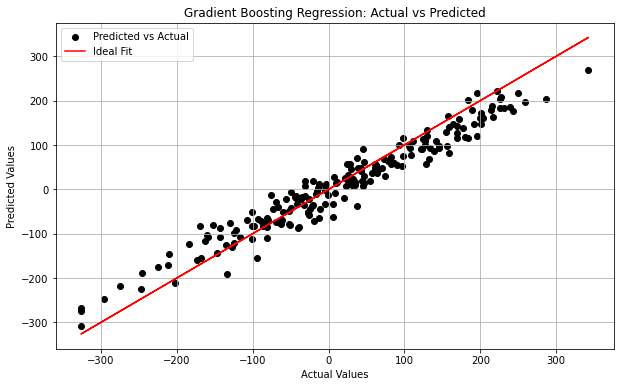

In [3]:
import numpy as np
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

# Gradient Boosting Regressor from First Principles
class GradientBoostingMachine:
    def __init__(self, n_estimators=100, learning_rate=0.1, max_depth=3):
        self.n_estimators = n_estimators
        self.learning_rate = learning_rate
        self.max_depth = max_depth
        self.trees = []
        self.F0 = None

    def fit(self, X, y):
        # Initialize with the mean of the target variable
        self.F0 = np.mean(y)
        F = np.full(len(y), self.F0)

        for _ in range(self.n_estimators):
            # Compute residuals (negative gradient)
            residuals = y - F
            
            # Fit a regression tree to residuals
            tree = DecisionTreeRegressor(max_depth=self.max_depth)
            tree.fit(X, residuals)
            self.trees.append(tree)
            
            # Update predictions
            F += self.learning_rate * tree.predict(X)

    def predict(self, X):
        # Start with initial prediction (mean of target variable)
        F = np.full(X.shape[0], self.F0)
        
        for tree in self.trees:
            F += self.learning_rate * tree.predict(X)
        
        return F

# Generate synthetic regression dataset
def create_synthetic_regression_dataset(n_samples=1000, n_features=10, noise=0.1, random_state=42):
    from sklearn.datasets import make_regression
    X, y = make_regression(n_samples=n_samples, n_features=n_features, noise=noise, random_state=random_state)
    return X, y

# Main function to test the implementation
def main():
    # Create synthetic dataset
    X, y = create_synthetic_regression_dataset()
    
    # Split into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Initialize and train the gradient boosting model
    model = GradientBoostingMachine(n_estimators=100, learning_rate=0.1, max_depth=3)
    model.fit(X_train, y_train)

    # Make predictions on the test set
    predictions = model.predict(X_test)

    # Calculate Mean Squared Error (MSE)
    mse = mean_squared_error(y_test, predictions)
    print(f"Mean Squared Error: {mse:.4f}")

    # Plot actual vs predicted values
    plt.figure(figsize=(10, 6))
    plt.scatter(y_test, predictions, color='black', label='Predicted vs Actual')
    plt.plot(y_test, y_test, color='red', label='Ideal Fit')  # Ideal line (y=x)
    plt.title('Gradient Boosting Regression: Actual vs Predicted')
    plt.xlabel('Actual Values')
    plt.ylabel('Predicted Values')
    plt.legend()
    plt.grid()
    plt.show()

# Run the main function
if __name__ == "__main__":
    main()